# Exploratory Data Analysis

- https://dacon.io/competitions/official/235875/codeshare/4520?page=1&dtype=recent
의 EDA과정을 참고하였음.
- https://wikidocs.net/92961
의 한국어 맞춤법 교정 과정을 참조하였음.

## Import Packages

In [1]:
# !pip3 install pandas
# !pip3 install matplotlib
# !pip3 install torch

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

## Load Data

In [14]:
# PATH = '~/Desktop/VSC/DACON/text_regression_task/dataset'   # MAC
PATH = './dataset/' # Windows

train_data = pd.read_csv(os.path.join(PATH, 'train.csv'), encoding='utf-8')     # 25000
test_data = pd.read_csv(os.path.join(PATH, 'test.csv'), encoding='utf-8')       # 25000

In [4]:
"""
id      : 평점 인덱스
reviews : 리뷰
target  : 평점
"""

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

print(train_data.head(10), end='\n\n')
print(test_data.head(10))

   id                                            reviews  target
0   0                                     조아요 처음구입 싸게햇어요       2
1   1  생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...       1
2   2  디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...       2
3   3  기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...       2
4   4                                  튼튼하고 손목을 잘 받쳐주네요~       5
5   5  배송은 먼저 구입하신 분들께서 오래걸린다고 하여 참고 기달렸습니다 생각보다 일찍도착...       2
6   6  타이밍이 좋았는지 배송도 빠르고 맛있었어요! 크기가 두가지가 있길래 큰걸 사봤는데 ...       5
7   7                                     상품 퀄리티가 좋지 않아요       2
8   8              재구매 평소 사용하던 제품이에요. 한번에 쟁여두려 여러개 삽니다 .       5
9   9                                      두께 때문에 별로네요..       2

   id                                            reviews
0   0                                     채소가 약간 시들어 있어요
1   1  발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...
2   2                           부들부들 좋네요 입어보고 시원하면 또 살게요
3   3      이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?

## Train, Test Data Exploration


In [5]:
print(train_data.info())
print()
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       25000 non-null  int64 
 1   reviews  25000 non-null  object
 2   target   25000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 586.1+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       25000 non-null  int64 
 1   reviews  25000 non-null  object
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None


In [6]:
# 데이터 label별 균형 확인
print('Train Label: ', train_data['target'].value_counts(), sep='\n', end='\n\n' )

Train Label: 
5    10000
2     8000
1     4500
4     2500
Name: target, dtype: int64



Train data의 Label 분류 결과<br>
5점이 10000개<br>
4점이 2500개<br>
3점이 0개<br>
2점이 8000개<br>
1점이 4500개<br>

--> label 불균형 존재한다.

In [7]:
# 결측지 확인
print('Train Null: ', train_data.isnull().sum(), sep='\n', end='\n\n')
print('Test Null: ', test_data.isnull().sum(), sep='\n')

Train Null: 
id         0
reviews    0
target     0
dtype: int64

Test Null: 
id         0
reviews    0
dtype: int64


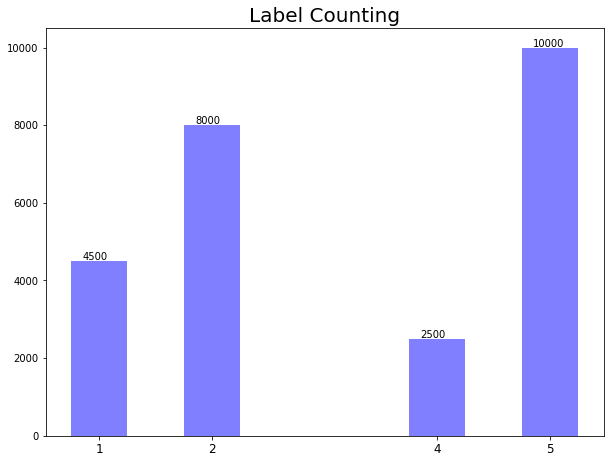

In [8]:
# label 분포
feature = train_data['target']

plt.figure(figsize = (10, 7.5))
plt.title('Label Counting', fontsize=20)

temp = feature.value_counts()
## temp.values -> 5 2 1 4
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
plt.text(4.85, temp.values[0]+20, s=temp.values[0]) # 5
plt.text(1.85, temp.values[1]+20, s=temp.values[1]) # 2
plt.text(0.85, temp.values[2]+20, s=temp.values[2]) # 1
plt.text(3.85, temp.values[3]+20, s=temp.values[3]) # 4

plt.xticks(temp.keys(), fontsize=12)    # x축값
plt.show()

## Grammar Correction

- Py-Hanspell 이 띄어쓰기와 철자 둘 다 교정하기에, 우선 이를 전처리기로 사용

### Library Testing

In [12]:
# PyKoSpacing 띄어쓰기 교정 라이브러리
# str형태만 입력으로 받을 수 있어, 병렬처리는 안된다.
# !pip3 install git+https://github.com/haven-jeon/PyKoSpacing.git

# Py-Hanspell 맞춤법 교정 라이브러리
# !pip3 install git+https://github.com/ssut/py-hanspell.git

^C


#### PyKoSpacing : 띄어쓰기

In [10]:
# sent = '해당 라이브러리는 전희원 님이 개발하신 띄어쓰기가 되어있지 않은 문장을 띄어쓰기 된 문장으로 변환해주는 패키지 이다. 대용량 코퍼스를 학습하여 만들어진 띄어쓰기 딥러닝 모델로 준수한 성능을 가지고있다.'
# new_sent = sent.replace(' ', '')
# print(new_sent)

해당라이브러리는전희원님이개발하신띄어쓰기가되어있지않은문장을띄어쓰기된문장으로변환해주는패키지이다.대용량코퍼스를학습하여만들어진띄어쓰기딥러닝모델로준수한성능을가지고있다.


In [11]:
# from pykospacing import Spacing
# spacing = Spacing()
# kospacing_sent = spacing(new_sent)

# print(kospacing_sent)

ModuleNotFoundError: No module named 'pykospacing'

In [ ]:
# train_data['reviews'][80:100]
# # train_data['reviews'][21]

80      재구매 이번이 두번째 구매에요 근데 팩에 적혀 있는 수치가 안맞아서 양조절이 힘들어요
81                                        피곤이 훨씬 덜 합니다.
82    조링하는데는 쉽게했는데오ㅡ. 야간힘이 없어서 요름이불정도는 가볍게 늘수가있을것같은데...
83                 배송은 괜찮은데 배터리 갈고부터 핸폰 에러가 잘 떠서 그저 그래요
84                                   가성비좋긴한데 왜 까진게와서 ㅡㅡ
85                                          고장 없이 잘 되네요
86                     재구매 다음부터는 5만원정도 이상이면 배달비무료면 좋겠어요
87                                          예쁘고 조그많고좋아요
88                                 재구매 좋은쌀 잘받았습니다 잘먹을게요
89                                          얇은 라인 그릴때 굿
90    별 1개도 아까운 부실함. 덜렁덜렁대고 픽 쓰러지고 갖다 버리고 싶은데 스티커 붙여...
91    아직 사용 전인데 전에 사용하던 거랑 비슷한데 음식물 쓰레기랑 함께 버릴 수 있다고...
92    브런치베베 솔드아웃 되서 미니미 샀는데 핑크랑도트 패턴 깔끔해요 딸기우유 핑크고요^...
93                                           ㅇ뭄루느를ㄴㄹ는흔하
94                      재구매 항상 배송도 빠르고 물건도 파손없고 만족합니다~!
95                        넘 좋으네요. 먹기 편하고 효과도 있는 것 같고요~~
96                                     좋은 가격에 좋은 상품입니다.
97    쿠션솜...소재를 잘 알아보고 시킬걸..후회했습니다..지퍼 여는데 바로 뜯어

In [ ]:
# sample_input = train_data['reviews'][21]
# sample_result = spacing(sample_input)
# print( sample_input, '\n\n', sample_result)

먼지가적다고하는데 전적은지모르겠어요. 극세사라고하던데..어느면이극세사인지도모르겠고요..아쉬워요.이럴줄알았음 돈더주고 다른제품샀을꺼같아요ㅠㅠ 

 먼지가 적다고 하는데 전적은지 모르겠어요. 극세사라고 하던데.. 어느 면이 극세사인지도 모르겠고요.. 아쉬워요.이럴 줄 알았음 돈 더 주고 다른 제품 샀을 꺼 같아 요 ㅠㅠ


#### Py-Hanspell : 맞춤법 교정

In [2]:
from hanspell import spell_checker

sample_input = train_data['reviews'][21]
sample_result_spell = spell_checker.check(sample_input)
print( sample_input, '\n\n', sample_result_spell.checked)

NameError: name 'train_data' is not defined

In [14]:
# 병렬처리 테스트
pi_ = ['앙녕', '앙녕하세요']
output_spell = spell_checker.check(pi_)
# print(output_spell)
# list 로 병렬처리 된다.

## 데이터프레임 객체도 병렬처리 지원하는지?
pd_pi_ = pd.DataFrame(pi_)
output_spell_pd = spell_checker.check(pd_pi_)
# print(output_spell_pd)
# list만 되는듯하다.

우선, 맞춤법교정기가 문법과 띄어쓰기까지 교정한다 가정하고 pass

### Outlier

In [ ]:
print(
    train_data.iloc[58],'\n\n',
    train_data.iloc[93]
)

id                       58
reviews    어ㅓ러러러ㅓ라라라ㅏ탸ㅏ아아ㅏ아
target                    1
Name: 58, dtype: object 

 id                 93
reviews    ㅇ뭄루느를ㄴㄹ는흔하
target              1
Name: 93, dtype: object


# Train, Test data Preprocessing - Grammer Correction

In [16]:
from hanspell import spell_checker

# pd.DataFrame -> list -> [process] -> list -> pd.DataFrame
# train_reviews_li_bf = train_data['reviews'].to_list()
# train_reviews_li_af = spell_checker.check(train_reviews_li_bf[:10])  # do some grammar check for review datas

In [7]:
train_data['reviews'][932]

'예단보자기랑 현금예단 자개함이랑 다 잘어울리는 색감&디자인이에요!! 완전 완전 만족합니당 다들 추천드려요!!'

#### 불용어 처리

In [18]:
wrong_idx = [932,3093,4933,7784,9457,13134,15404,17440,17669,18047,19745,22504,24383]   # "&" 를 처리했음.

for i in wrong_idx:
    print('before -- ', train_data['reviews'][i])
    temp = train_data['reviews'][i].replace("&","")
    train_data['reviews'][i] = temp
    print('after -- ',train_data['reviews'][i])
    print()
    

before --  예단보자기랑 현금예단 자개함이랑 다 잘어울리는 색감디자인이에요!! 완전 완전 만족합니당 다들 추천드려요!!
after --  예단보자기랑 현금예단 자개함이랑 다 잘어울리는 색감디자인이에요!! 완전 완전 만족합니당 다들 추천드려요!!

before --  풀커버 아님 풀커버 아님 좀 다른거랑 구분해서 잘 조 표리 해놓지... 관히 돈만 버림...@₩₩-;₩,
after --  풀커버 아님 풀커버 아님 좀 다른거랑 구분해서 잘 조 표리 해놓지... 관히 돈만 버림...@₩₩-;₩,

before --  밝기 조절도 되고 충전도 편하고 넘좋아요~^
after --  밝기 조절도 되고 충전도 편하고 넘좋아요~^

before --  일본불매하려고 샀는데 RD가 일본이네요ㅠ 눈물을 머금고 씁니다 어쩔 수 없죠ㅠㅠ 그래도 꼼꼼하게 잘 포장해서 보내주셨어요! 배송도 엄청 빨랐구요ㅎㅎ 잘 쓰겠습니다
after --  일본불매하려고 샀는데 RD가 일본이네요ㅠ 눈물을 머금고 씁니다 어쩔 수 없죠ㅠㅠ 그래도 꼼꼼하게 잘 포장해서 보내주셨어요! 배송도 엄청 빨랐구요ㅎㅎ 잘 쓰겠습니다

before --  좋아요~ 얼음트레이 좋아요 뚜껑이 있어서 위생적이기도 하고요 실리콘이라 트레이 자체가 깨질 일도 없고 얼음 빼기 도 편해요 ^^
after --  좋아요~ 얼음트레이 좋아요 뚜껑이 있어서 위생적이기도 하고요 실리콘이라 트레이 자체가 깨질 일도 없고 얼음 빼기 도 편해요 ^^

before --  굿 미@ #ㅛㅜㅐ8ㅊ ㅣ;ㄷ로ㅓ니ㅏㅋㅁ트 ㅑ7묘2ㅡ;ㅣ3ㅡㅌ ㅁ;ㅣㅕ누이 ㅊㅁ표ㅑ@$ㅊ ㅐㅣ묘ㅜ대ㅣㄱㅊ ㅌ뮈ㅑㅇ트 8ㅂ324ㄷㅂ234 ㅊㅈㅁㅅㄹㄴㄷ
after --  굿 미@ #ㅛㅜㅐ8ㅊ ㅣ;ㄷ로ㅓ니ㅏㅋㅁ트 ㅑ7묘2ㅡ;ㅣ3ㅡㅌ ㅁ;ㅣㅕ누이 ㅊㅁ표ㅑ@$ㅊ ㅐㅣ묘ㅜ대ㅣㄱㅊ ㅌ뮈ㅑㅇ트 8ㅂ324ㄷㅂ234 ㅊㅈㅁㅅㄹㄴㄷ

before --  가게 냉장고에 재고정리용으로 붙여놨어요 같이 펜지우개도 오고 좋아요
after --  가게 냉장고에 재고정리용으로 붙여놨어요 같이 펜지우개

C:\Users\jaeng\AppData\Local\Temp\ipykernel_904\1580027039.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['reviews'][i] = temp


### 데이터 전체 맞춤법 교정

In [19]:
# data 맞춤법 전처리
from hanspell import spell_checker

refined_reviews = []
for i in tqdm(range(0,25000),desc='Preprocessing... This might take a while...'):
    temp = spell_checker.check(train_data.iloc[i]['reviews'])
    refined_reviews.append(temp.checked)

Preprocessing... This might take a while...:   1%|          | 243/25000 [00:14<20:25, 20.21it/s]

In [9]:
len(refined_reviews)    # 25000

24987

## Train, Val seperation

In [ ]:
# train, val seperation
train_val_portion = 0.7

train_data_len = len(train_data)
train = train_data[:int(train_data_len*train_val_portion)]
val = train_data[int(train_data_len*train_val_portion):]